In [2]:
import matplotlib.pyplot as plt
import numpy as np


def get_dM1_dt(gw, M1w, yw, z):
    derivative = -(
            9 * gw ** 2 * yw ** 2 * z ** 3 + 41 * gw ** 2 * yw ** 2 * z ** 2 + 58 * gw ** 2 * yw ** 2 * z +
            24 * gw ** 2 * yw ** 2 + 14 * gw * yw * z ** 2 + 58 * gw * yw * z + 60 * gw * yw + 6 * z + 12
    ) * M1w * yw / (
            6 * gw ** 3 * yw 
** 3 * z ** 3 + 24 * gw ** 3 * yw ** 3 * z ** 2 + 30 * gw ** 3 * yw ** 3 * z +
            12 * gw ** 3 * yw ** 3 + 18 * gw ** 2 * yw ** 2 * z ** 2 + 66 * gw ** 2 * yw ** 2 * z +
            60 * gw ** 2 * yw ** 2 + 18 * gw * yw * z + 42 * gw * yw + 6
    )
    return derivative


def get_dy_dt(gw, M1w, yw, z):
    derivative = (
            gw ** 3 * yw ** 3 * z ** 5 + 5 * gw ** 3 * yw ** 3 * z ** 4 + 3 * gw ** 3 * yw ** 3 * z ** 3 -
            17 * gw ** 3 * yw ** 3 * z ** 2 - 28 * gw ** 3 * yw ** 3 * z - 12 * gw ** 3 * yw ** 3 +
            2 * gw ** 2 * yw ** 2 * z ** 4 + 5 * gw ** 2 * yw ** 2 * z ** 3 - 25 * gw ** 2 * yw ** 2 * z ** 2 -
            90 * gw ** 2 * yw ** 2 * z - 72 * gw ** 2 * yw ** 2 + gw * yw * z ** 3 - gw * yw * z ** 2 -
            18 * gw * yw * z - 30 * gw * yw - 6
                 ) * yw ** 2 / (
            6 * (
            gw ** 3 * yw ** 3 * z ** 3 + 4 * gw ** 3 * yw ** 3 * z ** 2 + 5 * gw ** 3 * yw ** 3 * z +
            2 * gw ** 3 * yw ** 3 + 3 * gw ** 2 * yw ** 2 * z ** 2 + 11 * gw ** 2 * yw ** 2 * z +
            10 * gw ** 2 * yw ** 2 + 3 * gw * yw * z + 7 * gw * yw + 1)
    )
    return derivative


def get_dz_dt(gw, M1w, yw, z):
    derivative = -gw * (
            gw ** 2 * yw ** 2 * z ** 6 + 9 * gw ** 2 * yw ** 2 * z ** 5 + 31 * gw ** 2 * yw ** 2 * z ** 4 +
            51 * gw ** 2 * yw ** 2 * z ** 3 + 40 * gw ** 2 * yw ** 2 * z ** 2 + 12 * gw ** 2 * yw ** 2 * z +
            2 * gw * yw * z ** 5 + 12 * gw * yw * z ** 4 + 14 * gw * yw * z ** 3 - 36 * gw * yw * z ** 2 -
            88 * gw * yw * z - 48 * gw * yw + z ** 4 + 2 * z ** 3 - z ** 2 - 2 * z
    ) * yw ** 2 / (
            6 * gw ** 3 * yw ** 3 * z ** 3 + 24 * gw ** 3 * yw ** 3 * z ** 2 + 30 * gw ** 3 * yw ** 3 * z +
            12 * gw ** 3 * yw ** 3 + 18 * gw ** 2 * yw ** 2 * z ** 2 + 66 * gw ** 2 * yw ** 2 * z +
            60 * gw ** 2 * yw ** 2 + 18 * gw * yw * z + 42 * gw * yw + 6
    )
    return derivative


def model_general(t, gw, M1w_yw_z):
    # z0 = 10
    # alpha = 0.1
    # gw = alpha / (z0 + 1)

    M1w, yw, z, = M1w_yw_z[0], M1w_yw_z[1], M1w_yw_z[2]

    dM1w_dt = get_dM1_dt(gw, M1w, yw, z)
    dyw_dt = get_dy_dt(gw, M1w, yw, z)
    dz_dt = get_dz_dt(gw, M1w, yw, z)

    return np.array([dM1w_dt, dyw_dt, dz_dt])


def RK4_PCH(model, gw, y_0, tt):
    y_i = y_0
    h = tt[1] - tt[0]
    y_sol = np.zeros((len(tt), 3))
    y_sol[0, :] = y_i

    for i, t in enumerate(tt[:-1]):

        y_i = y_sol[i, :]

        if i < 3:  # Runge-Kutta
            K1 = model(t, gw, y_i)
            K2 = model(t + h / 2, gw, y_i + h / 2 * K1)
            K3 = model(t + h / 2, gw, y_i + h / 2 * K2)
            K4 = model(t + h, gw, y_i + h * K3)
            y_new = y_i + h / 6 * (K1 + 2 * K2 + 2 * K3 + K4)
            y_sol[i + 1, :] = y_new
            
        else:  # predictor-corrector, Hamming
            f_i = model(tt[i], gw, y_sol[i, :])
            f_i_1 = model(tt[i - 1], gw, y_sol[i - 1, :])
            f_i_2 = model(tt[i - 2], gw, y_sol[i - 2, :])

            y_pred = y_sol[i - 3, :] + 4 * h / 3 * (2 * f_i - f_i_1 + 2 * f_i_2)
            y_new = 1 / 8 * (9 * y_sol[i, :] - y_sol[i - 2, :]) + 3 / 8 * h * (
                    -f_i_1 + 2 * f_i + model(tt[i + 1], gw, y_pred))
            y_sol[i + 1, :] = y_new

    return y_sol

In [3]:
t_total = 20
t_step = 0.001
tt = np.arange(0, t_total, t_step)

yw_0 = 1
z_0 = 10
M1w_0 = 1

solution_1 = RK4_PCH(model_general, 0.1 / (10 + 1), np.array([M1w_0, yw_0, 10]), tt)
solution_2 = RK4_PCH(model_general,   1 / (10 + 1), np.array([M1w_0, yw_0, 10]), tt)
solution_3 = RK4_PCH(model_general,  10 / (10 + 1), np.array([M1w_0, yw_0, 10]), tt)
solution_4 = RK4_PCH(model_general,  10 / (-0.8 + 1), np.array([M1w_0, yw_0, -0.8]), tt)
solution_5 = RK4_PCH(model_general,   1 / (-0.8 + 1), np.array([M1w_0, yw_0, -0.8]), tt)
solution_6 = RK4_PCH(model_general, 0.1 / (-0.8 + 1), np.array([M1w_0, yw_0, -0.8]), tt)

# Test first Boyd graph set:

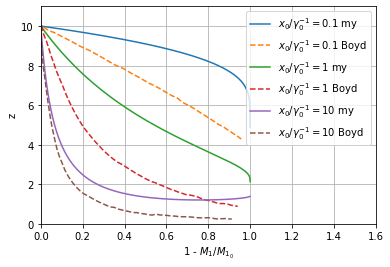

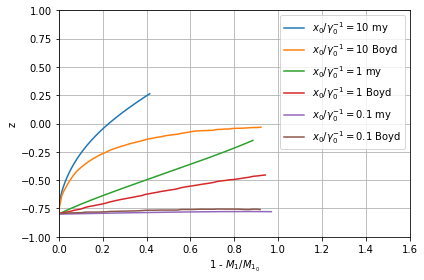

In [49]:
gr_1 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/odeint/curves/Boyd_1_10_0.1.txt')
gr_2 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/odeint/curves/Boyd_1_10_1.txt')
gr_3 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/odeint/curves/Boyd_1_10_10.txt')
gr_4 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/odeint/curves/Boyd_1_-0.8_10.txt')
gr_5 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/odeint/curves/Boyd_1_-0.8_1.txt')
gr_6 = np.loadtxt('/Users/fedor/PycharmProjects/MC_simulation/notebooks/odeint/curves/Boyd_1_-0.8_0.1.txt')

label_base = r'$x_0/ \gamma^{-1}_0=$'

plt.figure()

plt.plot(1 - solution_1[:, 0], solution_1[:, 2], label=label_base+'0.1 my')
plt.plot(gr_1[:, 0], gr_1[:, 1], '--', label=label_base+'0.1 Boyd')

plt.plot(1 - solution_2[:, 0], solution_2[:, 2], label=label_base+'1 my')
plt.plot(gr_2[:, 0], gr_2[:, 1], '--', label=label_base+'1 Boyd')

plt.plot(1 - solution_3[:, 0], solution_3[:, 2], label=label_base+'10 my')
plt.plot(gr_3[:, 0], gr_3[:, 1], '--', label=label_base+'10 Boyd')

plt.grid()
plt.legend(loc='upper right')

plt.xlabel('1 - $M_1/M_{1_0}$')
plt.ylabel('z')
plt.xlim(0, 1.6)
plt.ylim(0, 11)
plt.show()

plt.figure()
plt.plot(1 - solution_4[:, 0], solution_4[:, 2], label=label_base+'10 my')
plt.plot(gr_4[:, 0], gr_4[:, 1], label=label_base+'10 Boyd')

plt.plot(1 - solution_5[:, 0], solution_5[:, 2], label=label_base+'1 my')
plt.plot(gr_5[:, 0], gr_5[:, 1], label=label_base+'1 Boyd')

plt.plot(1 - solution_6[:, 0], solution_6[:, 2], label=label_base+'0.1 my')
plt.plot(gr_6[:, 0], gr_6[:, 1], label=label_base+'0.1 Boyd')

plt.grid()
plt.legend(loc='upper right')

plt.xlabel('1 - $M_1/M_{1_0}$')
plt.ylabel('z')
plt.xlim(0, 1.6)
plt.ylim(-1, 1)

plt.tight_layout()
plt.show()


In [50]:
solution_4

array([[ 1.        ,  1.        , -0.8       ],
       [ 1.00000927,  0.99902502, -0.79974435],
       [ 1.00001842,  0.99805183, -0.79948877],
       ...,
       [ 0.58514193,  0.04474275,  0.26393314],
       [ 0.58512806,  0.04474061,  0.26395049],
       [ 0.58511418,  0.04473846,  0.26396783]])